## Face Processing, General Tracking and Stabilization

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ksasi/EVA/blob/master/Project23/Assignment23.ipynb)

In [1]:
!nvidia-smi

Tue Nov 12 04:10:04 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## git clone the below and import the necessary functions

- https://github.com/spmallick/PyImageConf2018
- https://github.com/justadudewhohacks/face-recognition.js-models

In [3]:
!git clone https://github.com/spmallick/PyImageConf2018 ./PyImageConf2018
import sys
sys.path.append("/content/PyImageConf2018/")

Cloning into './PyImageConf2018'...
remote: Enumerating objects: 159, done.
remote: Total 159 (delta 0), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (159/159), 166.32 MiB | 11.13 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [4]:
!git clone https://github.com/justadudewhohacks/face-recognition.js-models ./face_recognition_js_models
MODEL_PATH = "/content/face_recognition_js_models/models/"
DATA_PATH = "/content/drive/My Drive/Files/"

Cloning into './face_recognition_js_models'...
remote: Enumerating objects: 73, done.
remote: Total 73 (delta 0), reused 0 (delta 0), pack-reused 73
Unpacking objects: 100% (73/73), done.


### face alignment using 5-pt detector

In [0]:
import dlib
import cv2
import numpy as np
from PyImageConf2018 import faceBlendCommon as fbc
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray' 


In [0]:
PREDICTOR_PATH_5_PT = MODEL_PATH + "shape_predictor_5_face_landmarks.dat"

In [0]:
faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH_5_PT)

In [0]:
from PyImageConf2018.faceBlendCommon import similarityTransform

def normalizeImagesAndLandmarks(outSize, imIn, pointsIn):
  h, w = outSize

  # Corners of the eye in input image
  if len(pointsIn) == 68:
    eyecornerSrc = [pointsIn[36], pointsIn[45]]
  elif len(pointsIn) == 5:
    eyecornerSrc = [pointsIn[2], pointsIn[0]]

  # Corners of the eye in normalized image
  eyecornerDst = [(np.int(0.3 * w), np.int(h/3)),
                  (np.int(0.7 * w), np.int(h/3))]

  # Calculate similarity transform
  tform = similarityTransform(eyecornerSrc, eyecornerDst)
  imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

  # Apply similarity transform to input image
  imOut = cv2.warpAffine(imIn, tform, (w, h))

  # reshape pointsIn from numLandmarks x 2 to numLandmarks x 1 x 2
  points2 = np.reshape(pointsIn, 
                      (pointsIn.shape[0], 1, pointsIn.shape[1]))

  # Apply similarity transform to landmarks
  pointsOut = cv2.transform(points2, tform)

  # reshape pointsOut to numLandmarks x 2
  pointsOut = np.reshape(pointsOut, 
                          (pointsIn.shape[0], pointsIn.shape[1]))

  return imOut, pointsOut

In [10]:

!ffmpeg -hwaccel cuvid -i "/content/drive/My Drive/Files/face_movement_video.mov" -vf fps=30 -s 720x1280 fc-%03d.jpeg

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
from pathlib import Path

pathlist = Path("/content").glob('**/*.jpeg')

#h = 1000
#w = 1270
h = 1580
w = 1000

for path in pathlist:
  im = cv2.imread(str(path))
  points = fbc.getLandmarks(faceDetector, landmarkDetector, im)
  points = np.array(points)
  im = np.float32(im)/255.0
  imNorm, points = normalizeImagesAndLandmarks((h, w), im, points)
  imNorm = np.uint8(imNorm*255)
  resized_w = cv2.resize(imNorm, (914, 720), interpolation = cv2.INTER_LINEAR)
  cv2.imwrite(path.stem + 'pred.jpeg', imNorm[0:1400, 40:860]) # Removes the black background
  #plt.imshow(imNorm[:,:,::-1])
  #plt.title("Aligned Image")
  #plt.show()

In [12]:
!ffmpeg -f image2 -framerate 30  -hwaccel cuvid -i fc-%03dpred.jpeg -s 720x1280 face_movement_aligned_video.mov

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!cp ./face_movement_aligned_video.mov /content/drive/"My Drive"/Files/face_movement_aligned_video.mov

### 68-pt landmark calculation on the aligned faces

In [0]:
PREDICTOR_PATH_68_PT = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"

In [0]:
faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH_68_PT)

In [0]:
import cv2
import numpy as np


def drawPolyline(im, landmarks, start, end, isClosed=False):
  points = []
  for i in range(start, end+1):
    point = [landmarks.part(i).x, landmarks.part(i).y]
    points.append(point)

  points = np.array(points, dtype=np.int32)
  cv2.polylines(im, [points], isClosed, (255, 200, 0), 
                  thickness=2, lineType=cv2.LINE_8)

In [0]:
# Use this function for any model other than
# 68 points facial_landmark detector model
def renderFace2(im, landmarks, fpath, color=(0, 255, 0), radius=3):
  for p in landmarks.parts():
    cv2.circle(im, (p.x, p.y), radius, color, -1)
    size = im.shape[0:1]
    cv2.putText(im, "68-pt unstabilzed points", (50, size[0]-50), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 0, 255), 3,cv2.LINE_AA)
    cv2.imwrite(fpath, im)

In [0]:
# Use this function for 68-points facial landmark detector model
def renderFace(im, landmarks, fpath):
    assert(landmarks.num_parts == 68)
    drawPolyline(im, landmarks, 0, 16)           # Jaw line
    drawPolyline(im, landmarks, 17, 21)          # Left eyebrow
    drawPolyline(im, landmarks, 22, 26)          # Right eyebrow
    drawPolyline(im, landmarks, 27, 30)          # Nose bridge
    drawPolyline(im, landmarks, 30, 35, True)    # Lower nose
    drawPolyline(im, landmarks, 36, 41, True)    # Left eye
    drawPolyline(im, landmarks, 42, 47, True)    # Right Eye
    drawPolyline(im, landmarks, 48, 59, True)    # Outer lip
    drawPolyline(im, landmarks, 60, 67, True)    # Inner lip
    size = im.shape[0:1]
    cv2.putText(im, "68-pt unstabilzed points", (50, size[0]-50), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 0, 255), 3,cv2.LINE_AA)
    cv2.imwrite(fpath, im)

In [0]:
def writeLandmarksToFile(landmarks, landmarksFileName):
  with open(landmarksFileName, 'w') as f:
    for p in landmarks.parts():
      f.write("%s %s\n" %(int(p.x),int(p.y)))

  f.close()

In [20]:
from pathlib import Path

pathlist = Path("/content").glob('**/*pred.jpeg')

h = 1000
w = 1270

for path in pathlist:
  im = cv2.imread(str(path))
  # landmarks will be stored in results/family_i.txt
  landmarksBasename = "/content/drive/My Drive/Files/family"

  # Detect faces in the image
  faceRects = faceDetector(im, 0)
  print("Number of faces detected: ",len(faceRects))

  # List to store landmarks of all detected faces
  landmarksAll = []

  
  # Loop over all detected face rectangles
  for i in range(0, len(faceRects)):

    newRect = dlib.rectangle(int(faceRects[i].left()),
                            int(faceRects[i].top()),
                            int(faceRects[i].right()),
                            int(faceRects[i].bottom()))
    # For every face rectangle, run landmarkDetector
    landmarks = landmarkDetector(im, newRect)
    # Print number of landmarks
    #if i==0:
      #print("Number of landmarks",len(landmarks.parts()))

    # Store landmarks for current face
    landmarksAll.append(landmarks)

    # Next, we render the outline of the face using
    # detected landmarks.
    renderFace2(im, landmarks, path.stem + '_68_o_pred.jpeg')
    renderFace(im, landmarks, path.stem + '_68_p_pred.jpeg')

    # The code below saves the landmarks to 
    # results/family_0.txt … results/family_4.txt.
    landmarksFileName = landmarksBasename +"_"+ str(i)+ ".txt"
    #print("Saving landmarks to", landmarksFileName)
    # Write landmarks to disk
    writeLandmarksToFile(landmarks, landmarksFileName)



Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of faces detected:  1
Number of face

In [21]:
!ffmpeg -f image2 -framerate 30 -hwaccel cuvid -i fc-%03dpred_68_o_pred.jpeg -s 720x1280 face_movement_68pt_o_video.mov

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [22]:
!ffmpeg -f image2 -framerate 30 -hwaccel cuvid -i fc-%03dpred_68_p_pred.jpeg -s 720x1280 face_movement_68pt_p_video.mov

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!cp ./face_movement_68pt_o_video.mov /content/drive/"My Drive"/Files/face_movement_68pt_o_video.mov
!cp ./face_movement_68pt_p_video.mov /content/drive/"My Drive"/Files/face_movement_68pt_p_video.mov

### Optical flow for these 68-pts and stabilization uing using LK method

In [0]:
import cv2, dlib
import numpy as np
import math, sys
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [0]:
PREDICTOR_PATH_68_PT = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"
RESIZE_HEIGHT = 480
NUM_FRAMES_FOR_FPS = 100
SKIP_FRAMES = 1

In [0]:
# Function to calculate the intereye distance.
def interEyeDistance(predict):
  leftEyeLeftCorner = (predict[36].x, predict[36].y)
  rightEyeRightCorner = (predict[45].x, predict[45].y)
  distance = cv2.norm(np.array(rightEyeRightCorner) - np.array(leftEyeLeftCorner))
  distance = int(distance)
  return distance

In [0]:
winName = "Stabilized facial landmark detector"

In [0]:
videoFileName = "/content/drive/My Drive/Files/face_movement_aligned_video.mov"

# Initializing video capture object.
cap = cv2.VideoCapture(videoFileName)

if(cap.isOpened()==False):
  print("Unable to load video")

In [0]:
winSize = 101
maxLevel = 10
fps = 30.0
# Grab a frame
ret,imPrev = cap.read()

In [0]:
# Finding the size of the image.
size = imPrev.shape[0:1]

In [0]:
detector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH_68_PT)

In [0]:
# Initializing the parameters
points=[]
pointsPrev=[]
pointsDetectedCur=[]
pointsDetectedPrev=[]

In [0]:
eyeDistanceNotCalculated = True
eyeDistance = 0
isFirstFrame = True
# Initial value, actual value calculated after 100 frames
fps = 10
showStabilized = True
count =0

In [35]:
from pathlib import Path

path = Path("/content")

num = 0
while(True):
  if (count==0):
    t = cv2.getTickCount()

  # Grab a frame
  ret,im = cap.read()

  if im is None:
    break
  imDlib = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  # COnverting to grayscale
  imGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  height = im.shape[0]
  IMAGE_RESIZE = float(height)/RESIZE_HEIGHT
  # Resize image for faster face detection
  imSmall = cv2.resize(im, None, fx=1.0/IMAGE_RESIZE, fy=1.0/IMAGE_RESIZE,interpolation = cv2.INTER_LINEAR)
  imSmallDlib = cv2.cvtColor(imSmall, cv2.COLOR_BGR2RGB)
  # Skipping the frames for faster processing
  '''if (count % SKIP_FRAMES == 0):
    faces = detector(imSmallDlib,0)'''

  faces = detector(imSmallDlib,0)
  # If no face was detected
  if len(faces)==0:
    print("No face detected")
    #resized_w = cv2.resize(im, (914, 720), interpolation = cv2.INTER_LINEAR)
    fndw = cv2.imwrite( 'spred' + str(num) + '.jpeg', im)
    print(fndw)
    print(num)
    num = num + 1

  # If faces are detected, iterate through each image and detect landmark points
  else:
    for i in range(0,len(faces)):
      print("face detected")
      # Face detector was found over a smaller image.
      # So, we scale face rectangle to correct size.
      newRect = dlib.rectangle(int(faces[i].left() * IMAGE_RESIZE),
        int(faces[i].top() * IMAGE_RESIZE),
        int(faces[i].right() * IMAGE_RESIZE),
        int(faces[i].bottom() * IMAGE_RESIZE))
      
      # Detect landmarks in current frame
      landmarks = landmarkDetector(imDlib, newRect).parts()
      
      # Handling the first frame of video differently,for the first frame copy the current frame points
      
      if (isFirstFrame==True):
        pointsPrev=[]
        pointsDetectedPrev = []
        [pointsPrev.append((p.x, p.y)) for p in landmarks]
        [pointsDetectedPrev.append((p.x, p.y)) for p in landmarks]
        imGrayPrev = imGray

      # If not the first frame, copy points from previous frame.
      else:
        pointsPrev=[]
        pointsDetectedPrev = []
        pointsPrev = points
        pointsDetectedPrev = pointsDetectedCur

      # pointsDetectedCur stores results returned by the facial landmark detector
      # points stores the stabilized landmark points
      points = []
      pointsDetectedCur = []
      [points.append((p.x, p.y)) for p in landmarks]
      [pointsDetectedCur.append((p.x, p.y)) for p in landmarks]

      # Convert to numpy float array
      pointsArr = np.array(points,np.float32)
      pointsPrevArr = np.array(pointsPrev,np.float32)

      # If eye distance is not calculated before
      if eyeDistanceNotCalculated:
        eyeDistance = interEyeDistance(landmarks)
        print(eyeDistance)
        eyeDistanceNotCalculated = False

      if eyeDistance > 100:
          dotRadius = 3
      else:
        dotRadius = 2

      print(eyeDistance)
      sigma = eyeDistance * eyeDistance / 400
      s = 2*int(eyeDistance/4)+1

      #  Set up optical flow params
      lk_params = dict(winSize  = (s, s), maxLevel = 5, criteria = (cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS, 20, 0.03))
      # Python Bug. Calculating pyramids and then calculating optical flow results in an error. So directly images are used.
      # ret, imGrayPyr= cv2.buildOpticalFlowPyramid(imGray, (winSize,winSize), maxLevel)

      pointsArr,status, err = cv2.calcOpticalFlowPyrLK(imGrayPrev,imGray,pointsPrevArr,pointsArr,**lk_params)
      

      # Converting to float
      pointsArrFloat = np.array(pointsArr,np.float32)

      # Converting back to list
      points = pointsArrFloat.tolist()

      # Final landmark points are a weighted average of
      # detected landmarks and tracked landmarks
      for k in range(0,len(landmarks)):
        d = cv2.norm(np.array(pointsDetectedPrev[k]) - np.array(pointsDetectedCur[k]))
        alpha = math.exp(-d*d/sigma)
        points[k] = (1 - alpha) * np.array(pointsDetectedCur[k]) + alpha * np.array(points[k])

      # Drawing over the stabilized landmark points
      if showStabilized is True:
        for p in points:
          cv2.circle(im,(int(p[0]),int(p[1])),dotRadius, (0,0,255),-1)
      else:
        for p in pointsDetectedCur:
          cv2.circle(im,(int(p[0]),int(p[1])),dotRadius, (255,0,0),-1)

      isFirstFrame = False
      count = count+1

      # Calculating the fps value
      if ( count == NUM_FRAMES_FOR_FPS):
        t = (cv2.getTickCount()-t)/cv2.getTickFrequency()
        fps = NUM_FRAMES_FOR_FPS/t
        count = 0
        isFirstFrame = True

      # Display the landmarks points
      cv2.putText(im, "68-pt stabilzed points", (50, size[0]-50), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 0, 255), 3,cv2.LINE_AA)
      #cv2.imshow(winName, im)
      #cv2_imshow(im)
      #resized_fw = cv2.resize(im, (914, 720), interpolation = cv2.INTER_LINEAR)
      fdw = cv2.imwrite( 'spred' + str(num) + '.jpeg', im)
      print(fdw)
      print(num)
      num = num + 1
      #key = cv2.waitKey(25) & 0xFF

      # Use spacebar to toggle between Stabilized and Unstabilized version.
      #if key==32:
        #showStabilized = not showStabilized

      # Stop the program.
      #if key==27:
        #sys.exit()
      # Getting ready for next frame
      imPrev = im
      imGrayPrev = imGray
    

#cv2.destroyAllwindows()
cap.release()

face detected
347
347
True
0
face detected
347
True
1
face detected
347
True
2
face detected
347
True
3
face detected
347
True
4
face detected
347
True
5
face detected
347
True
6
face detected
347
True
7
face detected
347
True
8
face detected
347
True
9
face detected
347
True
10
face detected
347
True
11
face detected
347
True
12
face detected
347
True
13
face detected
347
True
14
face detected
347
True
15
face detected
347
True
16
face detected
347
True
17
face detected
347
True
18
face detected
347
True
19
face detected
347
True
20
face detected
347
True
21
face detected
347
True
22
face detected
347
True
23
face detected
347
True
24
face detected
347
True
25
face detected
347
True
26
face detected
347
True
27
face detected
347
True
28
face detected
347
True
29
face detected
347
True
30
face detected
347
True
31
face detected
347
True
32
face detected
347
True
33
face detected
347
True
34
face detected
347
True
35
face detected
347
True
36
face detected
347
True
37
face detected
347


In [36]:
!ffmpeg -f image2 -framerate 30 -start_number 0  -hwaccel cuvid -i spred%d.jpeg -s 720x1280 face_movement_final_video.mov

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!cp ./face_movement_final_video.mov /content/drive/"My Drive"/Files/face_movement_final_video.mov

## Merge the vidoes side by side using ffmpeg

In [38]:
#!ffmpeg -i /content/drive/"My Drive"/Files/face_movement_aligned_video.mov -i /content/drive/"My Drive"/Files/face_movement_68pt_o_video.mov -i /content/drive/"My Drive"/Files/face_movement_final_video.mov -filter_complex "[1:v][0:v]scale2ref=oh*mdar:ih[1v][0v];[2:v][0v]scale2ref=oh*mdar:ih*(914/1280)*(720/514)[2v][0v];[0v][1v][2v]hstack=3,scale='2*trunc(iw/2)':'4*trunc(ih)'" final.mov

#!ffmpeg -i /content/drive/"My Drive"/Files/face_movement_aligned_video.mov -i /content/drive/"My Drive"/Files/face_movement_68pt_o_video.mov -i /content/drive/"My Drive"/Files/face_movement_final_video.mov -filter_complex "[0:v]scale=iw:ih[0v];[1:v][0v]scale2ref=w=iw:h=ih[1v][0v];[2:v]scale=iw:ih, setsar = 1143:1600,setdar = 127:100[2v];[2v][0v]scale2ref=w=iw:h=ih[2v][0v];[0v][1v][2v]hstack=3,scale='2*trunc(iw/2)':'2*trunc(ih/2)'" final.mov



!ffmpeg -i /content/drive/"My Drive"/Files/face_movement_video.mov -i /content/drive/"My Drive"/Files/face_movement_68pt_o_video.mov -i /content/drive/"My Drive"/Files/face_movement_final_video.mov -filter_complex "[0:v]scale=iw:ih[0v];[1:v][0v]scale2ref=w=iw:h=ih[1v][0v];[2:v]scale=iw:ih[2v];[2v][0v]scale2ref=w=iw:h=ih[2v][0v];[0v][1v][2v]hstack=3,scale='2*trunc(iw/2)':'2*trunc(ih/2)'" final.mov


ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!cp ./final.mov /content/drive/"My Drive"/Files/face_movement_stabilized_video.mov

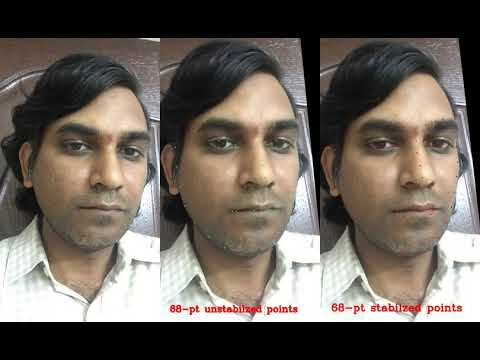

In [42]:
#@title Face Processing Video
from IPython.display import YouTubeVideo
YouTubeVideo('Um4hqORC6JA', width=600, height=400)

### **References & Attributions:**

- https://www.learnopencv.com/
- https://courses.learnopencv.com/
- https://www.ffmpeg.org/
- https://github.com/justadudewhohacks/face-recognition.js-models
- https://github.com/spmallick/PyImageConf2018
- http://dlib.net/

*Disclaimer: The contents of this notebook are used for educational purposes i.e. for learning and research.*